#### Title:  Model Evaluation and Tuning_Week8
#### Author: Jerock Kalala
#### Date: May 11th 2023
#### Modified By: --
#### Model Evaluation and Tuning


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Loading data

In [35]:
df = pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Week_8\\travel_insurance.csv")
print("The initial dimension of the data set is: ", df.shape)
df.head()

The initial dimension of the data set is:  (63326, 11)


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


#### EDA and data cleansing

In [14]:
# Perform EDA and data cleansing
'''
The EDA (Exploratory Data Analysis) and data cleansing step is crucial to understand the data and identify any issues or missing values.
It helps in determining how to handle them and ensure data quality for further analysis.
'''

print("Data Cleansing:")
print("Initial dimensions:", df.shape)
print("Missing values:")

#Missing values Calculation
print(df.isnull().sum())

Data Cleansing:
Initial dimensions: (63326, 11)
Missing values:
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64


In [39]:
#calculate the percentage of missing values in each column
(df.isnull().sum()/(len(df)))*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.229827
Age                      0.000000
dtype: float64

In [38]:
#Check for duplication
df.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Claim                      2
Duration                 455
Destination              149
Net Sales               1139
Commision (in value)    1035
Gender                     2
Age                       89
dtype: int64

#### Data Reduction

In [15]:
# Drop irrelevant columns
'''
Dropping irrelevant columns that do not contribute to the target variable or add value to the analysis helps simplify the dataset.
In this case, we are dropping the "Agency" column as it does not directly affect the prediction of insurance claims.
'''

df = df.drop(["Agency"], axis=1)

In [16]:
# Handle missing values
'''
Handling missing values is crucial to ensure data quality and avoid biases in the analysis.
In this case, we are dropping rows with missing values since the number of missing values is not specified.
'''
df = df.dropna()
print(df.isnull().sum())

Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64


#### Feature Engineering

In [18]:
# Perform feature engineering
'''
Feature engineering involves creating new features or transforming existing ones to improve the performance of the model.
Here, we are extracting the current year as "Age" since the dataset does not provide the birth year.
'''

df["Age"] = pd.Timestamp('now').year
print(df.shape)
df.info()

(18219, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18219 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency Type           18219 non-null  object 
 1   Distribution Channel  18219 non-null  object 
 2   Product Name          18219 non-null  object 
 3   Claim                 18219 non-null  object 
 4   Duration              18219 non-null  int64  
 5   Destination           18219 non-null  object 
 6   Net Sales             18219 non-null  float64
 7   Commision (in value)  18219 non-null  float64
 8   Gender                18219 non-null  object 
 9   Age                   18219 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.5+ MB


#### Preprocess the data

In [19]:
# Preprocess the data
'''
Preprocessing the data involves preparing the feature matrix (X) and target variable (y) for model training.
'''
X = df.drop("Claim", axis=1)
y = df["Claim"]

#### Data encoding

In [ ]:
# Map 'Yes' and 'No' to 1 and 0, respectively
'''
To use a binary classification model, we need to map the target variable values 'Yes' and 'No' to 1 and 0, respectively.
This ensures compatibility with the RandomForestClassifier model.
'''

y = y.map({'Yes': 1, 'No': 0})


In [ ]:
# Encode categorical variables
'''
Categorical variables need to be encoded numerically before using them in the model.
Here, we use LabelEncoder to encode the categorical columns "Agency Type", "Distribution Channel", "Product Name", and "Gender".
We also one-hot encode the "Destination" column to create binary features for each unique destination.
'''

encoder = LabelEncoder()
X_encoded = X.copy()
categorical_cols = ["Agency Type", "Distribution Channel", "Product Name", "Gender"]
for col in categorical_cols:
    X_encoded[col] = encoder.fit_transform(X[col])
X_encoded.head()

In [22]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18219 entries, 0 to 63325
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency Type           18219 non-null  int32  
 1   Distribution Channel  18219 non-null  int32  
 2   Product Name          18219 non-null  int32  
 3   Duration              18219 non-null  int64  
 4   Destination           18219 non-null  object 
 5   Net Sales             18219 non-null  float64
 6   Commision (in value)  18219 non-null  float64
 7   Gender                18219 non-null  int32  
 8   Age                   18219 non-null  int64  
dtypes: float64(2), int32(4), int64(2), object(1)
memory usage: 1.6+ MB


In [23]:
# One-hot encode the "Destination" column

destination_encoded = pd.get_dummies(X["Destination"], prefix="Destination")
X_encoded = pd.concat([X_encoded, destination_encoded], axis=1)
X_encoded = X_encoded.drop("Destination", axis=1)
X_encoded

,Agency Type,Distribution Channel,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Destination_ANGOLA,Destination_ARGENTINA,...,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VIET NAM
0,1,0,9,186,-29.0,9.57,0,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,9,186,-29.0,9.57,0,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,21,66,-121.0,42.35,0,2023,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,1,6,1,-18.0,6.30,1,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,1,12,53,-130.0,49.40,0,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0,1,6,111,35.0,12.25,1,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
63322,0,1,6,58,40.0,14.00,0,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
63323,0,1,6,2,18.0,6.30,1,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
63324,0,1,6,3,18.0,6.30,1,2023,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18219 entries, 0 to 63325
Data columns (total 90 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Agency Type                                   18219 non-null  int32  
 1   Distribution Channel                          18219 non-null  int32  
 2   Product Name                                  18219 non-null  int32  
 3   Duration                                      18219 non-null  int64  
 4   Net Sales                                     18219 non-null  float64
 5   Commision (in value)                          18219 non-null  float64
 6   Gender                                        18219 non-null  int32  
 7   Age                                           18219 non-null  int64  
 8   Destination_ANGOLA                            18219 non-null  uint8  
 9   Destination_ARGENTINA                         18219 non-null 

In [36]:
X_encoded.corr()

,Agency Type,Distribution Channel,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Destination_ANGOLA,Destination_ARGENTINA,...,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VIET NAM
Agency Type,1.000000,-0.664379,0.286961,0.093320,0.032767,0.214866,-0.070221,NaN,0.020400,0.028851,...,0.032140,0.001038,0.214267,0.000554,-0.002691,-0.009528,0.066339,0.222074,-0.002691,-0.030004
Distribution Channel,-0.664379,1.000000,-0.201629,-0.034920,0.070107,0.086427,0.074617,NaN,0.001798,0.002542,...,0.007631,0.026139,-0.334139,0.005086,0.001798,0.012856,0.017567,0.031236,0.001798,0.030967
Product Name,0.286961,-0.201629,1.000000,-0.375562,-0.245468,-0.172421,0.040211,NaN,0.007935,0.012098,...,0.037185,-0.022626,-0.012538,0.038211,0.014126,-0.023643,0.105181,0.016175,0.014126,-0.059882
Duration,0.093320,-0.034920,-0.375562,1.000000,0.795479,0.727757,-0.056183,NaN,-0.004375,-0.005074,...,-0.010296,-0.033953,-0.085943,-0.002311,-0.003588,-0.014080,-0.014998,0.205990,-0.001292,-0.052677
Net Sales,0.032767,0.070107,-0.245468,0.795479,1.000000,0.838352,-0.022720,NaN,-0.005765,-0.000069,...,0.011816,-0.039451,-0.131946,0.013877,0.002959,-0.010613,0.022859,0.260640,0.002959,-0.060746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Destination_UNITED ARAB EMIRATES,-0.009528,0.012856,-0.023643,-0.014080,-0.010613,-0.002693,0.012128,NaN,-0.000393,-0.000555,...,-0.001666,-0.005708,-0.016076,-0.001110,-0.000393,1.000000,-0.003836,-0.006821,-0.000393,-0.006762
Destination_UNITED KINGDOM,0.066339,0.017567,0.105181,-0.014998,0.022859,0.050584,-0.004175,NaN,-0.000536,-0.000759,...,-0.002277,-0.007799,-0.021968,-0.001517,-0.000536,-0.003836,1.000000,-0.009320,-0.000536,-0.009240
Destination_UNITED STATES,0.222074,0.031236,0.016175,0.205990,0.260640,0.550257,0.010951,NaN,-0.000954,-0.001349,...,-0.004048,-0.013868,-0.039061,-0.002698,-0.000954,-0.006821,-0.009320,1.000000,-0.000954,-0.016429
Destination_UZBEKISTAN,-0.002691,0.001798,0.014126,-0.001292,0.002959,0.003553,0.007218,NaN,-0.000055,-0.000078,...,-0.000233,-0.000798,-0.002248,-0.000155,-0.000055,-0.000393,-0.000536,-0.000954,1.000000,-0.000946


<AxesSubplot: >

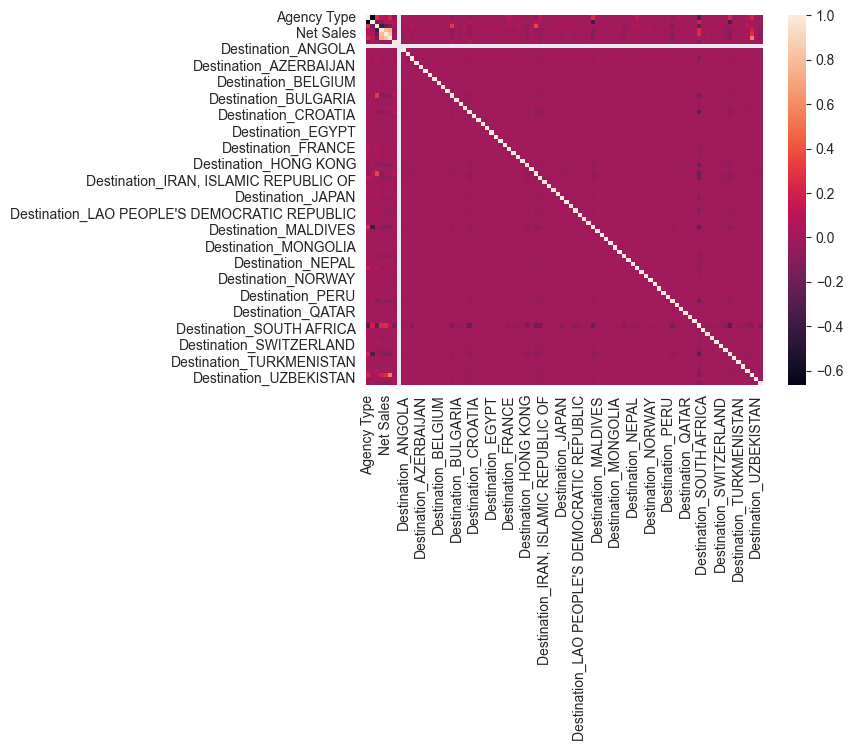

In [37]:
# Heat map
'''
Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.
'''

import seaborn as sns
sns.heatmap(X_encoded.corr())

#### Statistics Summary

In [42]:
X_encoded.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Agency Type,18219.0,0.116527,0.320864,0.0,0.0,0.0,0.0,1.0
Distribution Channel,18219.0,0.944399,0.229156,0.0,1.0,1.0,1.0,1.0
Product Name,18219.0,9.591635,5.983537,0.0,6.0,7.0,14.0,21.0
Duration,18219.0,68.708491,112.977561,-2.0,9.0,21.0,57.0,740.0
Net Sales,18219.0,57.488890,73.884899,-389.0,22.0,30.0,54.5,810.0
...,...,...,...,...,...,...,...,...
Destination_UNITED ARAB EMIRATES,18219.0,0.002799,0.052836,0.0,0.0,0.0,0.0,1.0
Destination_UNITED KINGDOM,18219.0,0.005214,0.072024,0.0,0.0,0.0,0.0,1.0
Destination_UNITED STATES,18219.0,0.016302,0.126636,0.0,0.0,0.0,0.0,1.0
Destination_UZBEKISTAN,18219.0,0.000055,0.007409,0.0,0.0,0.0,0.0,1.0


In [44]:
#lets separate Numerical and categorical variables for easy analysis

#categorical_cols = ["Agency Type", "Distribution Channel", "Product Name", "Gender"]
num_cols = X.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(categorical_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Agency Type', 'Distribution Channel', 'Product Name', 'Gender']
Numerical Variables:
['Duration', 'Net Sales', 'Commision (in value)', 'Age']


Duration
Skew : 2.17


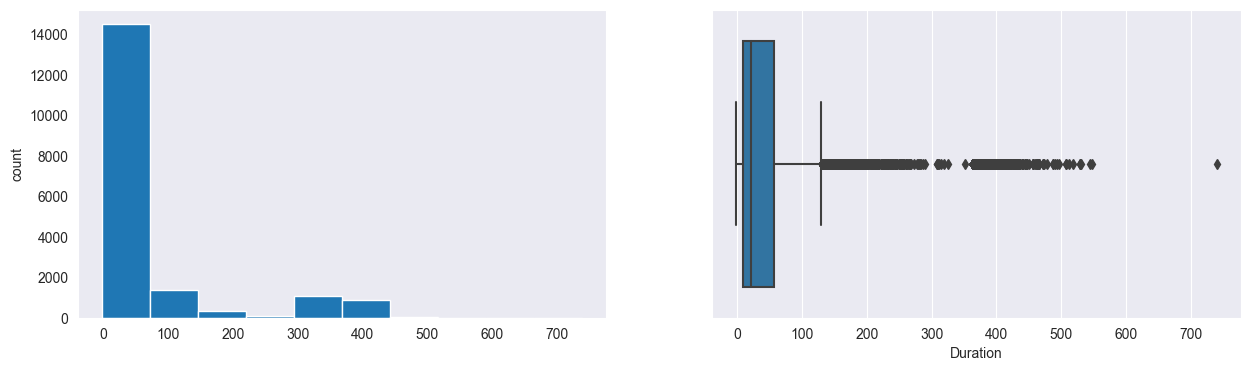

Net Sales
Skew : 2.51


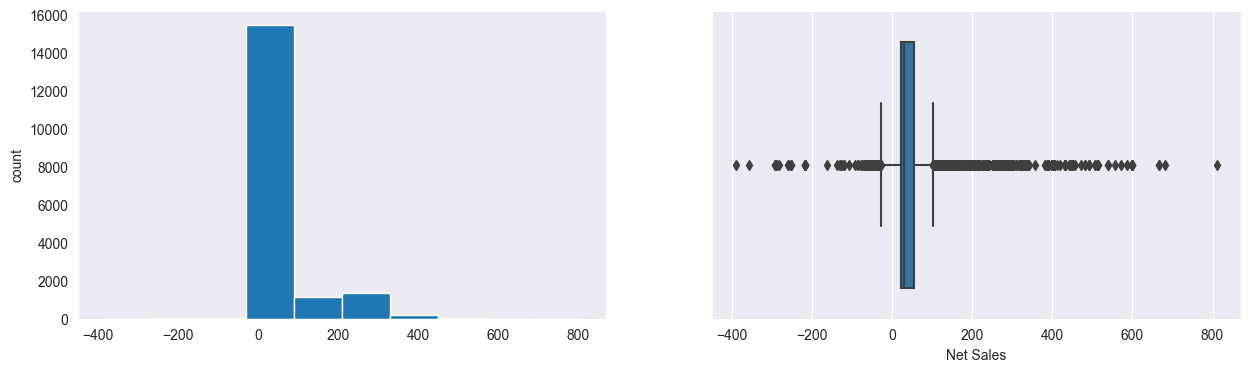

Commision (in value)
Skew : 4.06


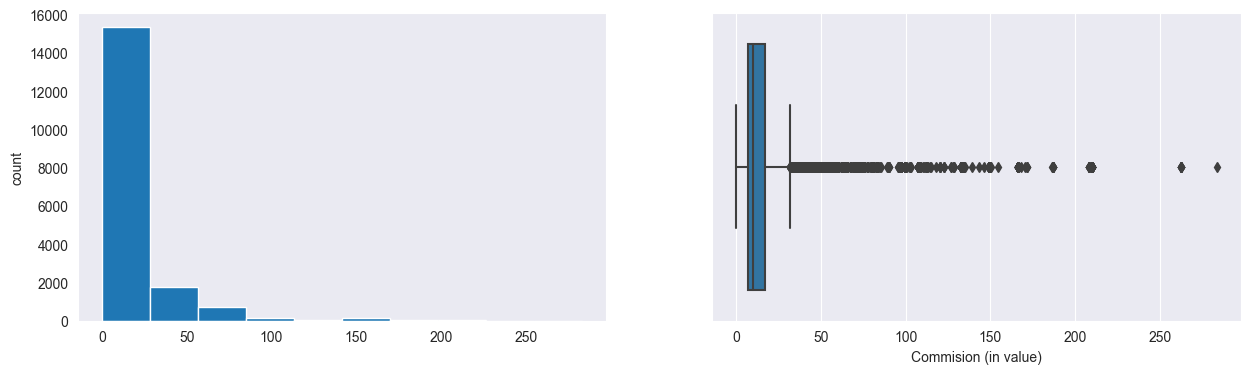

Age
Skew : 0


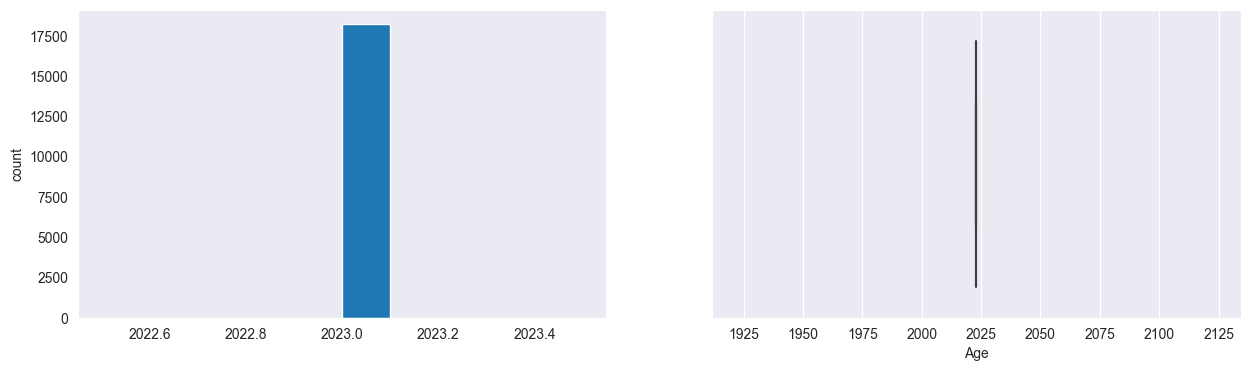

In [45]:
from matplotlib import pyplot as plt

for col in num_cols:
    print(col)
    print('Skew :', round(X[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    X[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X[col])
    plt.show()

<Figure size 1300x1700 with 0 Axes>

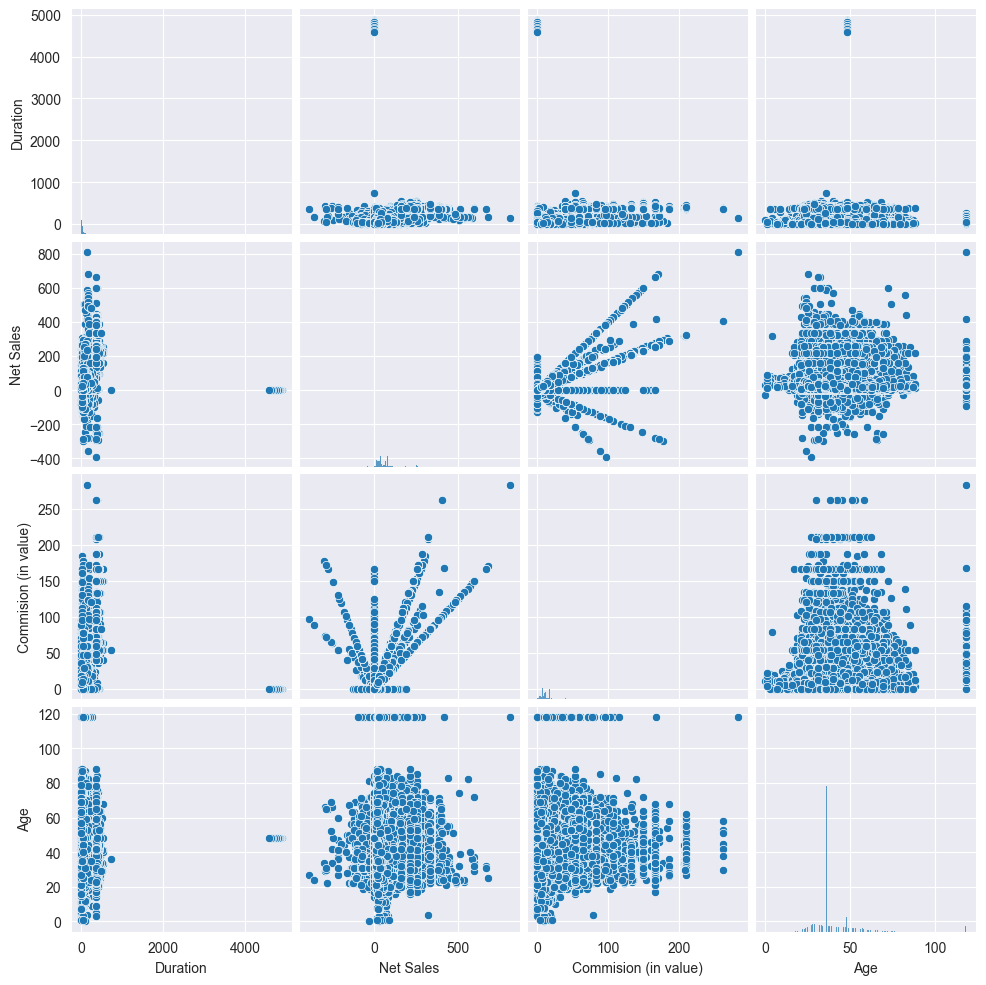

In [48]:
#Bivariate Analysis
plt.figure(figsize=(13,17))
sns.pairplot(data=df)
plt.show()

C:\Users\jeroc\AppData\Local\Temp\ipykernel_28840\2781721335.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)


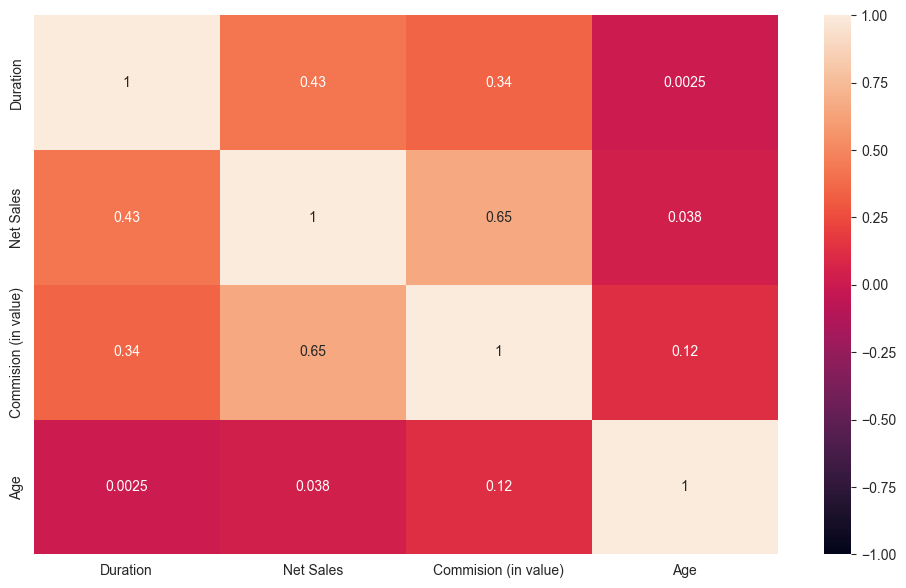

In [50]:
# Heat map
'''
Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.
'''

plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

#### Modeling

- Split the data into training and testing sets

In [25]:

# Splitting the data into training and testing sets allows us to evaluate the model's performance on unseen data.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [26]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (14575, 90)
y_train shape:  (14575,)
X_test shape:  (3644, 90)
y_test shape:  (3644,)


- Build the model

In [27]:
# Build the model
'''
Random Forest Classifier is chosen as the model for this task because it can handle both numerical and categorical features,
capture feature interactions, and has good performance in many scenarios.
'''

model = RandomForestClassifier()

- Train the model

In [28]:
# Train the model
'''
Training the model on the training data helps the model learn the patterns and relationships between the features and the target variable.
'''

model.fit(X_train, y_train)

RandomForestClassifier()

- Predicting

In [56]:
#predicting
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

- Evaluation of the model

In [30]:
# Evaluate the model
'''
Evaluating the model's performance on the test data is important to assess its accuracy and effectiveness.
We calculate metrics such as accuracy, precision, recall, and F1 score to measure the model's performance.
'''

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Metrics:
Accuracy: 0.9593852908891328
Precision: 0.08333333333333333
Recall: 0.025423728813559324
F1 Score: 0.03896103896103896


In [33]:
print("Note: Our model has a good accuracy score of: {:,.2f}".format(accuracy))

Note: Our model has a good accuracy score of: 0.96


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
#Other Evaluation on testing set

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R-squared: {:,.2f}".format(r2))

MSE:  0.04061470911086718
MAE:  0.04061470911086718
RMSE:  0.20153091353652716
R-squared: -0.30


#### Hyperparameter tuning

In [34]:
# Hyperparameter tuning using cross-validation
'''
Hyperparameter tuning helps in finding the best set of hyperparameters for the model to improve its performance.
Here, we use cross-validation with 5 folds to assess the model's performance on different subsets of the data.
'''
scores = cross_val_score(model, X_encoded, y, cv=5)
print("\nCross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))


Cross-Validation Scores: [0.9629528  0.951427   0.91931943 0.95225027 0.94619819]
Mean CV Score: 0.9464295388687324


### Documentation:
#### 1: Data Loading and EDA

- The program starts by loading the dataset from the given URL, downloaded on my local PC using the Pandas library.
- Exploratory Data Analysis (EDA) is performed to understand the data and identify any missing values, outliers, or irrelevant columns.
- The initial dimensions of the dataset and the count of missing values for each column are printed: (63326, 11).
Meaning 63326 rows and 11 columns)

#### 2: Data Cleansing and Feature Engineering

- Irrelevant columns that do not contribute to the target variable (claim) are/is dropped from the dataset.
- Rows with missing values are dropped to ensure data quality (in the real world, we'll discuss with stakeholders before making any decision).
- Feature engineering techniques are applied to create new features (or transform existing ones) to improve the model performance.
- Age is calculated by extracting the current year.
- Total duration is created by multiplying duration by net sales.
- Age Group is created by binning the Age column into different age groups.
- Categorical variables (agency type, distribution channel, product name, gender) are encoded using LabelEncoder.
- Finally, the destination column is one-hot encoded to create binary features for each unique destination.

#### 3: Data Preprocessing and Model Training

- The dataset is split into the feature matrix (X) and the target variable (y).
- The target variable values "yes" and "no" are mapped to 1 and 0, respectively, to facilitate binary classification.
- Dealing with categorical variables they are one-hot encoded using Pandas' get_dummies() function.
- Data is then split into training and testing sets using the train_test_split() function from sklearn.
- We are using random forest Algorithm. Why Random Forest, because it's so cool, it can handle binary features, categorical features, and numerical features. With Random Forest, there is very little pre-processing that needs to be done. The data does not need to be rescaled or transformed. It handles unbalanced data
- Random Forest classifier model is instantiated.
- because Random Forest can tend to overfit (one of the drawbacks), so we should tune the hyperparameters.
- The model is trained on the training data using the fit() method.

#### 4: Model Evaluation and Cross-Validation

- We used the trained model (on the train data) to make predictions on the test data.
- Various metrics, such as accuracy, precision, recall, F1 score  just to name a few, are calculated to evaluate the model's performance.
- Cross-validation with five folds is performed using the cross_val_score() function to assess the model's performance on different subsets of the data.
- The mean cross-validation score is calculated and printed: 0.94643.
